In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history


Init Plugin
Init Graph Optimizer
Init Kernel


# Importando a base de dados

In [4]:

(train_images, train_labels), (test_images,
                               test_labels) = tfds.as_numpy(tfds.load('fashion_mnist', split=['train', 'test'],
                                                                      batch_size=-1, as_supervised=True))


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(
    f"Base de treinamento:{train_images.shape[0]} imagens com {train_images.shape[1]} x {train_images.shape[2]} pixels")

print(
    f"Base de teste:{test_images.shape[0]} imagens com {test_images.shape[1]} x {test_images.shape[2]} pixels")



Base de treinamento:60000 imagens com 28 x 28 pixels
Base de teste:10000 imagens com 28 x 28 pixels


# Pré-processando os dados

Podemos notar que os pixels estão entre 0 e 255

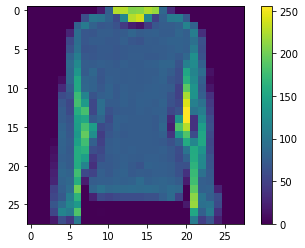

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Verificando que esta tudo ok com a base


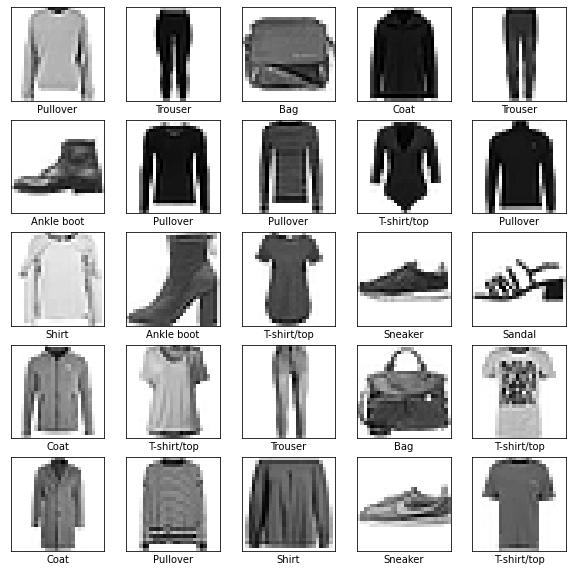

In [10]:
# Vamos padronizar os valores para o intervalo [0,1]
# Vamos confirmar o range de pixel na nossa base
train_images.min()
train_images.max()

test_images.min()
test_images.max()


train_images = train_images / 255.0
test_images = test_images / 255.0


print('Verificando que esta tudo ok com a base')
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Gerando o nosso modelo


In [13]:

model = keras.Sequential([
    # Transforma a imagem na dimensão 28x28px
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    # Essas são camadas neurais densely connected, ou fully connected
    keras.layers.Dense(128, activation='relu'),  # 128 nós
    # Retorna uma probabilidade de 10 classes, a soma da 1
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2589 - accuracy: 0.9043 - val_loss: 0.3379 - val_accuracy: 0.8775
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2503 - accuracy: 0.9076 - val_loss: 0.3201 - val_accuracy: 0.8830
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2441 - accuracy: 0.9101 - val_loss: 0.3246 - val_accuracy: 0.8822
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2354 - accuracy: 0.9128 - val_loss: 0.3212 - val_accuracy: 0.8880
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2308 - accuracy: 0.9149 - val_loss: 0.3062 - val_accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2244 - accuracy: 0.9168 - val_loss: 0.3130 - val_accuracy: 0.8901
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2163 - accuracy: 0.9193 - val_loss: 0.3065 - val_acc

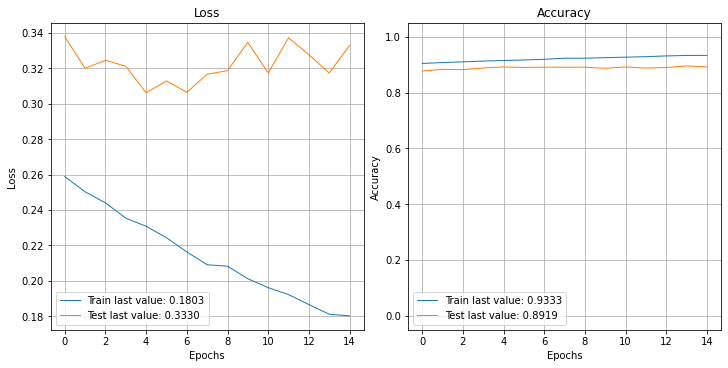

In [15]:
history = model.fit(train_images, train_labels, validation_data=(
    test_images, test_labels), epochs=15)

show_history(history)
